# Load cowsl2h data


In [1]:
import os
import glob
import pandas as pd
carpeta = "CSV"
archivos_csv = glob.glob(os.path.join(carpeta, "*.csv"))

# Leer y combinar todos los archivos CSV en un solo DataFrame
dataframes = [pd.read_csv(archivo) for archivo in archivos_csv]

# Combinar todos los DataFrames en uno solo (opcional, depende de lo que quieras hacer)
df_combined = pd.concat(dataframes, ignore_index=True)
print(len(df_combined))
# Quitar la primera columna (Unnamed: 0) si es innecesaria
df_combined = df_combined.drop(columns=['Unnamed: 0'])
data = df_combined.loc[df_combined['corrected1'].notna() | df_combined['corrected2'].notna()]
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# Corregir valores intercambiados entre 'gender' y 'age'
for index, row in data.iterrows():
    if isinstance(row['gender'], int) or is_number(row['gender']):
        # Si 'gender' contiene un número, probablemente estén intercambiados
        data.at[index, 'gender'], data.at[index, 'age'] = row['age'], row['gender']

# Opcional: convertir la columna 'age' a numérica para asegurarse de que todos son números
data['age'] = pd.to_numeric(data['age'], errors='coerce')
print(len(data))


5382
2881


/var/folders/4l/hmt81rgx3z58rvt_q1lpkfdw0000gn/T/ipykernel_24841/764812455.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = pd.to_numeric(data['age'], errors='coerce')


In [2]:
df_combined

,id,prompt,quarter,course,age,gender,l1 language,other l1 language(s),language(s) used at home,language(s) studied,...,a personal annotator1,a personal annotator2,gender-number annotator1,gender-number annotator2,updated anntoation ann1,updated annotation ann2,verbs annotation ann1,verbs annotation ann2,corrected1,corrected2
0,145594,vacation,W18,SPA 32,Female,19,Spanish,NaN,NaN,NaN,...,Una vacación perfecta para mí sería ir a Méxic...,NaN,Una [vacación]{vacaciones}<in:s:noun:inan> per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117105,vacation,W18,SPA 3,Male,22,English,NaN,NaN,4 yrs of Spanish,...,Una Vacación Perfecta\n\nUn mes antes de comen...,NaN,Una [Vacación]{vacaciones}<in:s:noun:inan> Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103347,vacation,W18,SPA 2,Female,21,Other,Hmong,Hmong,"English, 17 years",...,"Si voy a Cancún, México, serían unas vacacione...",NaN,"Si voy a Cancún, México, serían unas vacacione...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,174600,vacation,W18,SPA 3,Male,18,English,NaN,NaN,NaN,...,Si pudiera viajar a cualquier lugar por vacaci...,NaN,Si pudiera viajar a cualquier lugar por vacaci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,150891,vacation,W18,SPA 32,Female,19,"English,Spanish",NaN,"Spanish, but mostly English",I learned both English and Spanish simultaneou...,...,Mi vacation ideal\n\nAl poder planear la vacac...,NaN,Mi vacation ideal\n\nAl poder planear la [vaca...,NaN,[Mi]{Mis}<in:det> [vacation]{vacaciones}<in:no...,NaN,NaN,NaN,Mi vacación ideal Al poder planear la vacació...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,138630,famous,S18,SPA 2,Male,23 años.,"English,Mandarin",NaN,"Mandarin occasionally, but primarily English.",NaN,...,Una persona muy famosa es un hombre que se lla...,NaN,Una persona muy famosa es un hombre que se lla...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5378,158950,famous,S18,SPA 3,Female,19,English,NaN,Cantonese,"French, 3 years",...,Eleanor Roosevelt fue una persona muy influyen...,NaN,Eleanor Roosevelt fue una persona muy influyen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5379,151677,famous,S18,SPA 3,Female,20,English,NaN,no,NaN,...,Quiero escirbir sobre Tom Hanks. Tom Hanks es ...,NaN,Quiero escirbir sobre Tom Hanks. Tom Hanks es ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5380,172249,famous,S18,SPA 21,Female,18,English,English is my native language.,"No, I only speak English at home.",I have only studied Spanish other than English.,...,Una persona famosa que me interesa es John Kra...,NaN,Una persona famosa que me interesa es John Kra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data

,id,prompt,quarter,course,age,gender,l1 language,other l1 language(s),language(s) used at home,language(s) studied,...,a personal annotator1,a personal annotator2,gender-number annotator1,gender-number annotator2,updated anntoation ann1,updated annotation ann2,verbs annotation ann1,verbs annotation ann2,corrected1,corrected2
4,150891,vacation,W18,SPA 32,19.0,Female,"English,Spanish",NaN,"Spanish, but mostly English",I learned both English and Spanish simultaneou...,...,Mi vacation ideal\n\nAl poder planear la vacac...,NaN,Mi vacation ideal\n\nAl poder planear la [vaca...,NaN,[Mi]{Mis}<in:det> [vacation]{vacaciones}<in:no...,NaN,NaN,NaN,Mi vacación ideal Al poder planear la vacació...,NaN
8,146744,vacation,W18,SPA 23,19.0,Female,English,no,no,no,...,"En mi idea de un viaje perfecto, sería con mi ...",NaN,"En mi idea de un viaje perfecto, sería con mi ...",NaN,"En mi idea de un viaje perfecto, sería con mi ...",NaN,NaN,NaN,"Mi idea de un viaje perfecto, sería con mi nov...",NaN
9,154161,vacation,W18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Mi perfecto vacacion es en Italia con mi famil...,NaN,Mi [perfecto]{perfecta}<ga:fm:adj:inan> [vacac...,NaN,[Mi]{Mis}<in:det> [perfecto]{perfectas}<gat:in...,[Mi]{mis}<in:det> [perfecto]{perfectas}<ga:in:...,NaN,NaN,Mis vacaciones perfectas son en Italia con mi ...,NaN
14,130021,vacation,W18,SPA 21,20.0,Male,English,NaN,NaN,NaN,...,Un vacacion perfecta para mi es una viaje para...,NaN,[Un]{una}<ga:fm:det:inan> [vacacion]{vacacione...,NaN,[Un]{Unas}<ga:in:det> [vacacion]{vacaciones}<i...,NaN,NaN,NaN,Una vacación perfecta para mí es un viaje por ...,NaN
24,127621,vacation,W18,SPA 2,20.0,Female,Other,Farsi,Farsi,French 4 years,...,Unas vacaciones perfectas para mí es ir a Reno...,NaN,Unas vacaciones perfectas para mí es ir a Reno...,NaN,Unas vacaciones perfectas para mí es ir a Reno...,Unas vacaciones perfectas para mí es ir a Reno...,NaN,NaN,Unas vacaciones perfectas para mí es ir a Reno...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,151422,famous,S18,SPA 21,20.0,Female,English,NaN,NaN,NaN,...,Realmente no conozco [a]{a}<aa:do:an> ninguna...,NaN,Realmente no conozco a ninguna persona famosa ...,NaN,Realmente no conozco a ninguna persona famosa ...,NaN,NaN,NaN,Realmente no conozco a ninguna persona famosa ...,NaN
5368,157984,famous,S18,SPA 1,19.0,Female,English,NaN,NaN,American Sign Language,...,Gina Rodriguez es una actriz fabulosa. Ella es...,NaN,Gina Rodriguez es una actriz fabulosa. Ella es...,NaN,﻿Gina Rodriguez es una actriz fabulosa. [Ella]...,Gina Rodriguez es una actriz fabulosa. Ella es...,NaN,NaN,Gina Rodriguez es una actriz fabulosa. Ella es...,NaN
5373,125237,famous,S18,SPA 33,20.0,Male,"English,Spanish",NaN,Spanish,"French, 3 years",...,Muchas gentes famosas tienen un talento como i...,NaN,Muchas [gentes]{gente}<in:p:noun:an> famosas t...,NaN,Muchas gentes famosas tienen un talento como [...,[Muchas]{mucha}<in:det> [gentes]{gente}<in:nou...,NaN,NaN,Muchas personas famosas tienen un talento como...,NaN
5374,171259,famous,S18,SPA 2,18.0,Female,Mandarin,NaN,Mandarin,Japanese study online,...,Lorde es una cantante famosa. Ella es de Nueva...,NaN,Lorde es una cantante famosa. Ella es de Nueva...,NaN,Lorde es una cantante famosa. Ella es de Nuev...,Lorde es una cantante famosa. [Ella]{}<pr:su:p...,NaN,NaN,Lorde es una cantante famosa. Ella es de Nueva...,NaN


## Missing values

In [4]:
# Contar los valores NaN en cada columna
nan_por_columna = df_combined.isna().sum()

# Mostrar el resultado
print(nan_por_columna)

id                             0
prompt                         0
quarter                        0
course                       118
age                          151
gender                       187
l1 language                  184
other l1 language(s)        3406
language(s) used at home    1369
language(s) studied         2333
listening comprehension      502
reading comprehension        502
speaking ability             503
writing ability              504
study abroad                 505
essay                          0
a personal annotator1       3660
a personal annotator2       4421
gender-number annotator1    3665
gender-number annotator2    4984
updated anntoation ann1     2462
updated annotation ann2     3841
verbs annotation ann1       4201
verbs annotation ann2       5382
corrected1                  2501
corrected2                  4817
dtype: int64


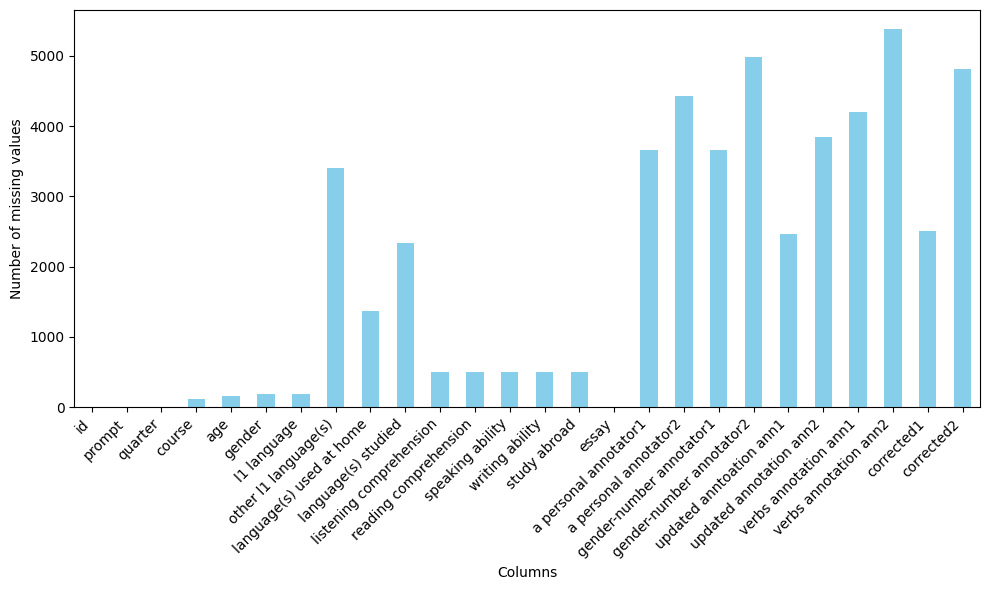

In [5]:
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame
# data = pd.read_csv('tu_archivo.csv')  # Descomenta y reemplaza 'tu_archivo.csv' con tu archivo real

# Calcula la cantidad de NaN por columna
nan_por_columna = df_combined.isna().sum()

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
nan_por_columna.plot(kind='bar', color='skyblue')


plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.xticks(rotation=45, ha='right')

# Muestra el gráfico
plt.tight_layout()  # Para ajustar el espacio si las etiquetas son largas
plt.show()

## EDA

/var/folders/4l/hmt81rgx3z58rvt_q1lpkfdw0000gn/T/ipykernel_24841/4182576162.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompt_counts.index, y=prompt_counts.values, palette='tab10')


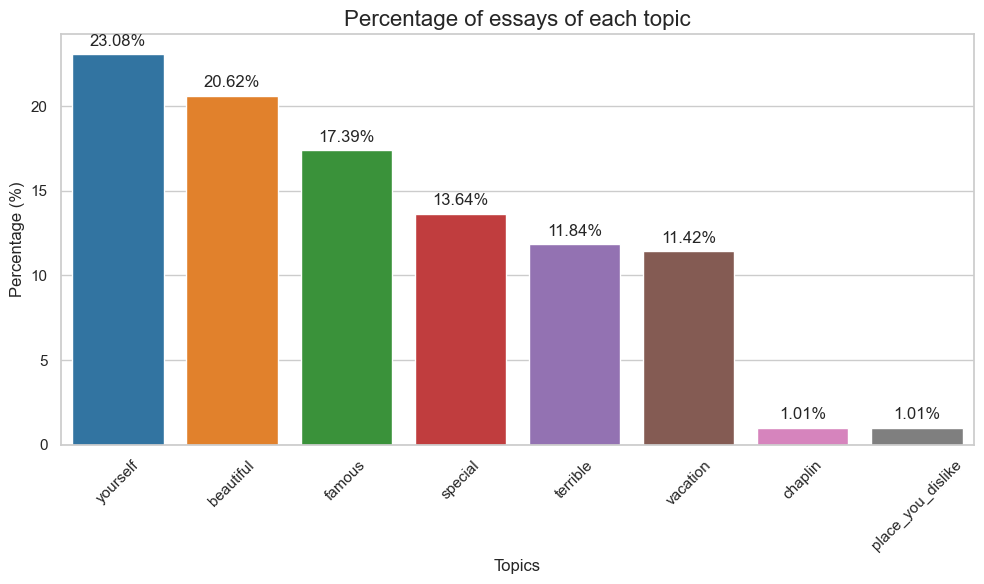

In [21]:
# Contar el número de observaciones por cada tipo de prompt
prompt_counts = data['prompt'].value_counts(normalize=True) * 100

# Determinar el índice del prompt con el valor más alto
max_prompt_index = prompt_counts.idxmax()

# Reducir el valor del prompt más alto en 1.01%
prompt_counts[max_prompt_index] -= 1.01

# Añadir un nuevo valor para "place_you_dislike"
prompt_counts['place_you_dislike'] = 1.01

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=prompt_counts.index, y=prompt_counts.values, palette='tab10')

# Añadir etiquetas y título
plt.title('Percentage of essays of each topic', fontsize=16)
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Mostrar los porcentajes en cada barra
for i, value in enumerate(prompt_counts.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/4l/hmt81rgx3z58rvt_q1lpkfdw0000gn/T/ipykernel_24841/3800972818.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompt_counts.index, y=prompt_counts.values, palette="tab10")


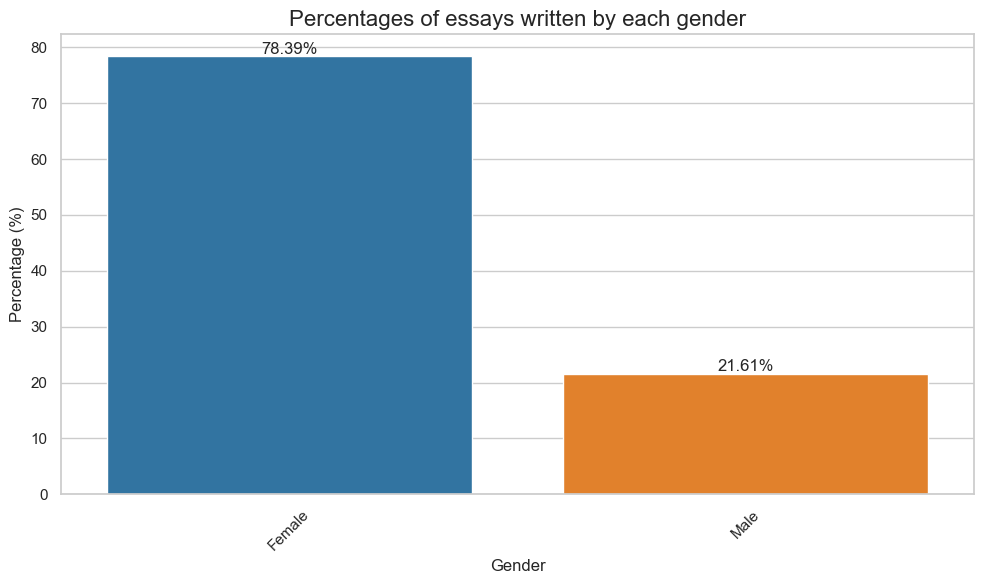

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las filas donde 'gender' sea 'Male' o 'Female'
filtered_data = data[data['gender'].isin(['Male', 'Female'])]

# Contar el número de observaciones por cada tipo de gender
prompt_counts = filtered_data['gender'].value_counts(normalize=True) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=prompt_counts.index, y=prompt_counts.values, palette="tab10")

# Añadir etiquetas y título
plt.title('Percentages of essays written by each gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Mostrar los porcentajes en cada barra
for i, value in enumerate(prompt_counts.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/4l/hmt81rgx3z58rvt_q1lpkfdw0000gn/T/ipykernel_24841/2066214306.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=filtered_data, palette='tab10')


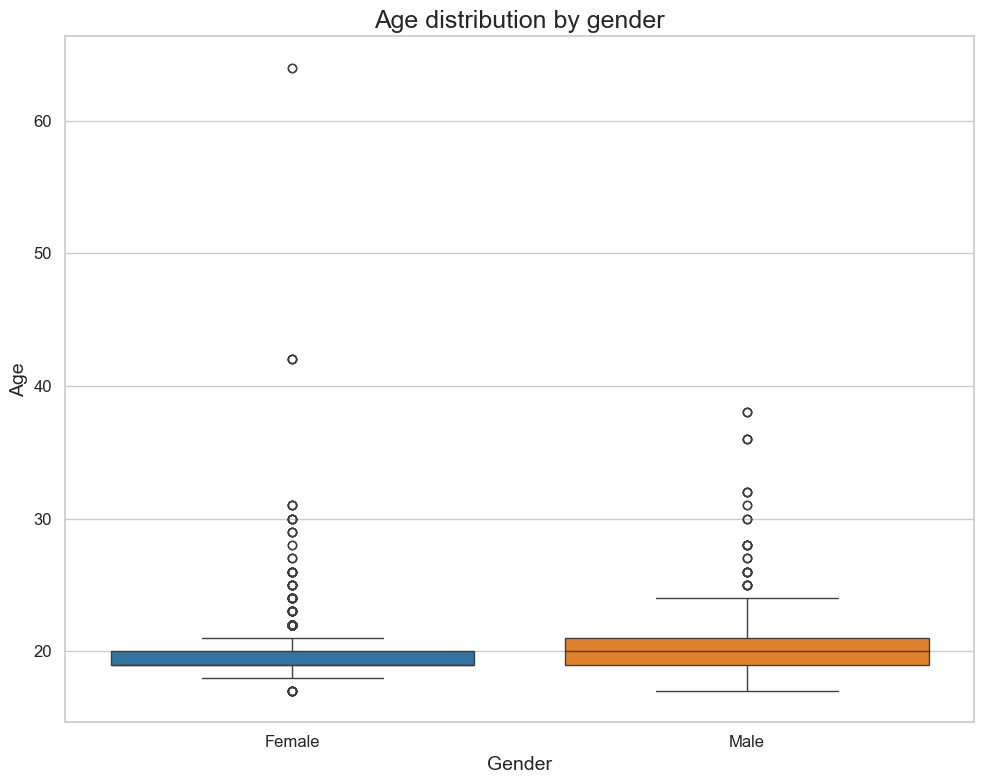

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data manipulation, assuming 'data' is your DataFrame
# Ensure your DataFrame 'data' has the columns 'age' and 'gender'
filtered_data = data[data['gender'].isin(['Male', 'Female'])]  # Only include 'Male' and 'Female' genders

# Create a vertical box plot, one for each gender
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")  # Use a white grid style for better aesthetics

sns.boxplot(x='gender', y='age', data=filtered_data, palette='tab10')

# Add more aesthetics
plt.title('Age distribution by gender', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/4l/hmt81rgx3z58rvt_q1lpkfdw0000gn/T/ipykernel_24841/2816869004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=course_counts.index, y=course_counts.values, palette='viridis')


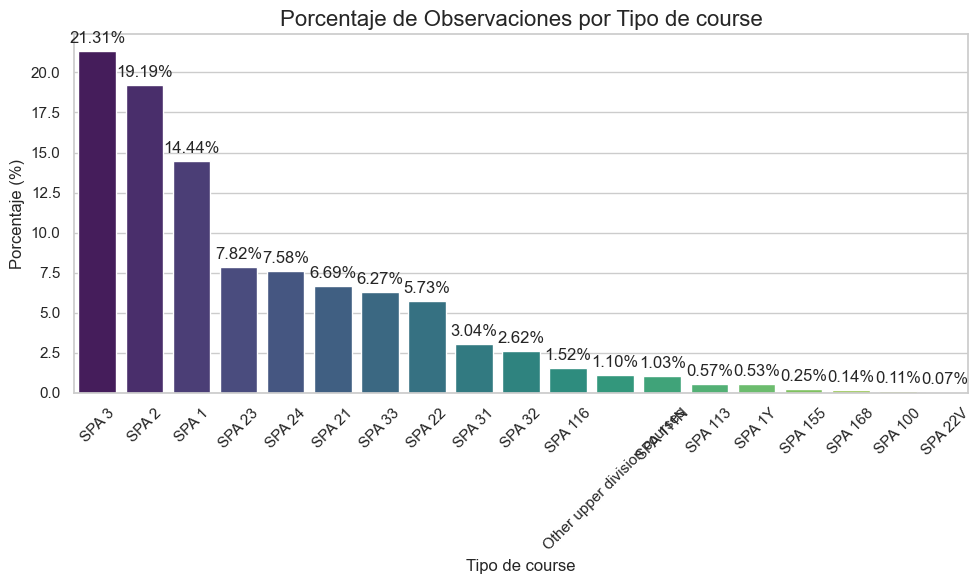

In [9]:
# Contar el número de observaciones por cada tipo de course
course_counts = data['course'].value_counts(normalize=True) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=course_counts.index, y=course_counts.values, palette='viridis')

# Añadir etiquetas y título
plt.title('Porcentaje de Observaciones por Tipo de course', fontsize=16)
plt.xlabel('Tipo de course', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)

# Mostrar los porcentajes en cada barra
for i, value in enumerate(course_counts.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


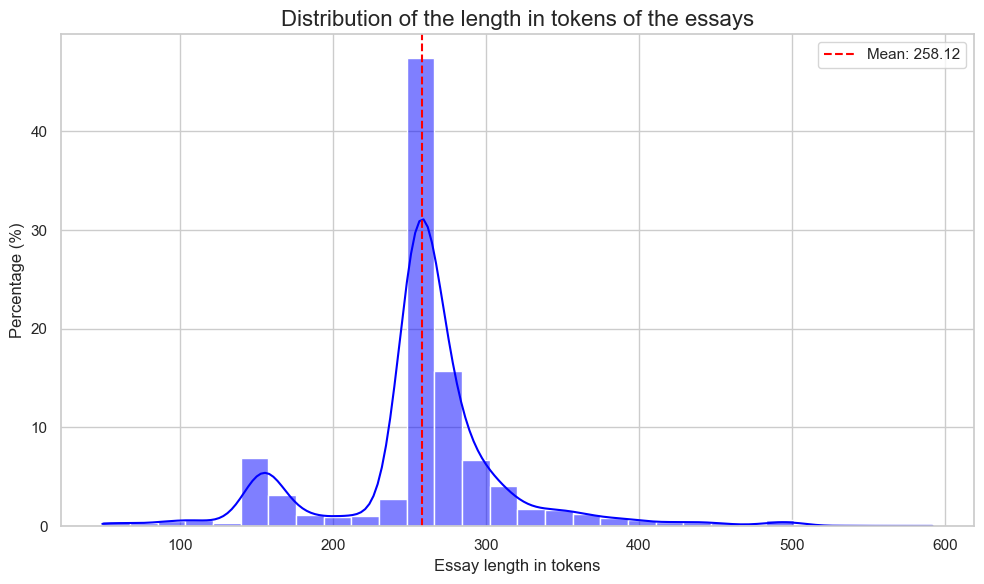

La longitud media de los textos es: 258.12
La longitud más larga es 592


In [ ]:
data['essay_word_count'] = data['essay'].apply(lambda x: len(str(x).split()))
# Calcular la media de la longitud de los textos
mean_length = data['essay_word_count'].mean()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el histograma usando seaborn
sns.histplot(data['essay_word_count'], bins=30, kde=True, color='blue')

# Añadir una línea vertical para la media
plt.axvline(mean_length, color='red', linestyle='--', label=f'Media: {mean_length:.2f}')

# Añadir título y etiquetas
plt.title('Distribución de la Longitud de los Textos en la Columna Essay', fontsize=16)
plt.xlabel('Longitud del Texto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar la media por consola
print(f"La longitud media de los textos es: {mean_length:.2f}")
print(f"La longitud más larga es {data['essay_word_count'].max()}")

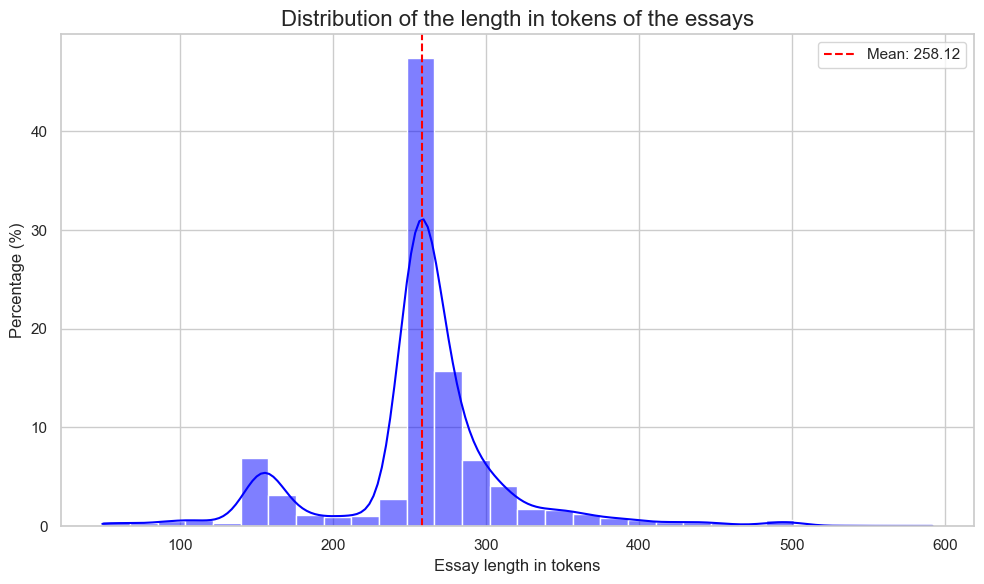

La longitud media de los textos es: 258.12
La longitud más larga es 592


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el número total de textos
total_textos = data['essay_word_count'].count()

# Calcular la media de la longitud de los textos
mean_length = data['essay_word_count'].mean()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el histograma usando seaborn con porcentaje en el eje y
sns.histplot(data['essay_word_count'], bins=30, kde=True, color='blue', stat='percent')

# Añadir una línea vertical para la media
plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.2f}')

# Añadir título y etiquetas
plt.title('Distribution of the length in tokens of the essays', fontsize=16)
plt.xlabel('Essay length in tokens', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Mostrar la media por consola
print(f"La longitud media de los textos es: {mean_length:.2f}")
print(f"La longitud más larga es {data['essay_word_count'].max()}")

/var/folders/4l/hmt81rgx3z58rvt_q1lpkfdw0000gn/T/ipykernel_24841/3432100952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['corrected1_word_count'] = data['corrected1'].apply(lambda x: len(str(x).split()))


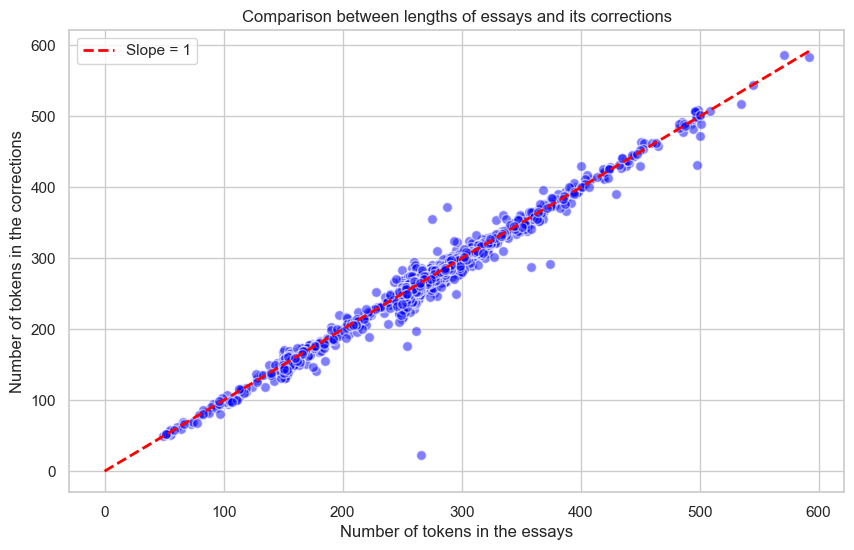

In [23]:
data['corrected1_word_count'] = data['corrected1'].apply(lambda x: len(str(x).split()))

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(data['essay_word_count'], data['corrected1_word_count'], alpha=0.5, c='blue', edgecolors='w', s=50)
plt.xlabel('Number of tokens in the essays')
plt.ylabel('Number of tokens in the corrections')
plt.title('Comparison between lengths of essays and its corrections')
plt.grid(True)
# Agregar una línea de pendiente 1 que comienza en (0, 0)
max_val = max(data['essay_word_count'].max(), data['corrected1_word_count'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', linewidth=2, label='Slope = 1')

# Mostrar la leyenda
plt.legend()


plt.show()